- 데이터를 로딩하시오
- 데이터를 확인 (탐색적 데이터 처리)
- 'yes' = 1 'no'=0
- 데이터를 8:2로 분할
- GradientBoostingClassifier
- estimators_[0][0] 에 대해 시각화
- 테스트 데이터에 대하여 scoring
- 변수 중요도를 시각화 하고
- GridSearchCV를 이용해서 최적의 파라미터를 확인하시오
    - 중요하다고 생각하는 hyper parameter에 대하여 최적화를 해 (3개이상)

In [2]:
import pandas as pd
df = pd.read_csv("pim.csv",encoding="utf8")
df[["type"]] = df[["type"]].apply(lambda x: x.astype('category').cat.codes)
df

,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age,type
0,1,6,148,72,35,33.6,0.627,50,1
1,2,1,85,66,29,26.6,0.351,31,0
2,3,1,89,66,23,28.1,0.167,21,0
3,4,3,78,50,32,31.0,0.248,26,1
4,5,2,197,70,45,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
327,328,2,88,58,26,28.4,0.766,22,0
328,329,9,170,74,31,44.0,0.403,43,1
329,330,10,101,76,48,32.9,0.171,63,0
330,331,5,121,72,23,26.2,0.245,30,0


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop("npreg",axis=1)
Y = df.npreg

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size=0.8)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.01, n_estimators=1000)

In [5]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,
                           random_state=0)

In [6]:
gbc.estimators_[0][0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x1C968FAD940)

In [9]:
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.tree import export_graphviz
dot_data = export_graphviz(gbc.estimators_[0][0],out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False)

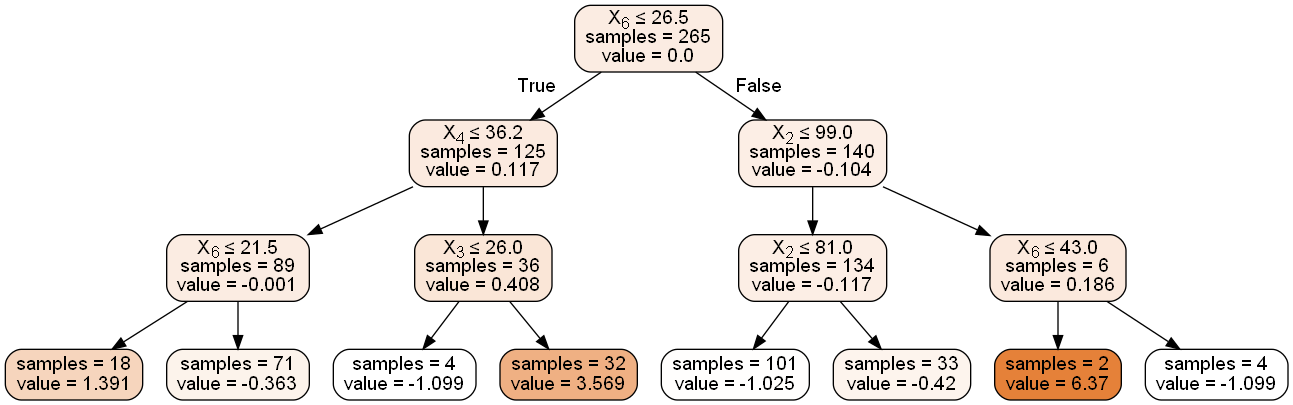

In [10]:
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
gbc.fit(X_test,y_test)
print(gbc.score(X,Y))

0.35240963855421686


In [13]:
gbc.fit(X_train,y_train)
print(gbc.feature_importances_)

[0.20022355 0.11860531 0.103345   0.08462473 0.13169691 0.15794229
 0.1955886  0.00797361]


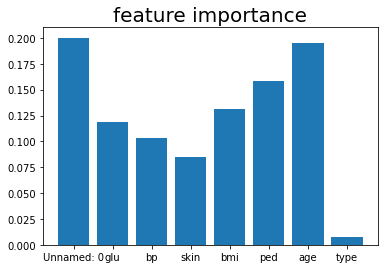

In [16]:
import numpy as np
import matplotlib.pyplot as plt
col=df.columns.tolist()
del col[1]
index = np.arange(len(col))
plt.bar(index, gbc.feature_importances_)
plt.title('feature importance', fontsize=20)
plt.xticks(index, col, fontsize=10)
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [3,5,7],
             'learning_rate': [0.1,0.01],
             'n_estimators' : [10,100,1000]}
grid = GridSearchCV(gbc,param_grid)
grid.fit(X_train, y_train)

C:\Users\020\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  n_estimators=1000,
                                                  random_state=0),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'n_estimators': [10, 100, 1000]})

In [18]:
print(grid.best_params_)
print(grid.best_estimator_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
GradientBoostingClassifier(learning_rate=0.01, random_state=0)
